출처 
- LH 한국토지주택공사 : https://seereal.lh.or.kr/main.do

## 필요함수 정의

In [45]:
# 분기별로 묶기
# (1) 3개 행씩 더하기
# (2) 중복된 행 중 첫번째 행 제외하고 제거

def season(data):

    for i in range(0,60,3):
        data.iloc[i:i+3] = data.iloc[i:i+3].sum()

    data.drop_duplicates(inplace=True)

    return data

In [46]:
# 고유값 확인 

def uni(data):
    for col in data.columns:
        print(f'{col} =>\n {data[col].unique()}\n')

In [47]:
# 행 인덱스 정의

idx = []
for i in range(17,23):
    for j in range(1,5):
        idx.append(f'{i}.{j}')

idx = idx[3:-1]
idx

['17.4',
 '18.1',
 '18.2',
 '18.3',
 '18.4',
 '19.1',
 '19.2',
 '19.3',
 '19.4',
 '20.1',
 '20.2',
 '20.3',
 '20.4',
 '21.1',
 '21.2',
 '21.3',
 '21.4',
 '22.1',
 '22.2',
 '22.3']

## 착공 데이터 전처리

In [48]:
# 모듈 로딩

import pandas as pd

In [49]:
# 데이터 불러오기 & 데이터 정보 확인

start = pd.read_excel('data/착공.xlsx')

start.info()

print()

start.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   시점       143 non-null    int64
 1   서울특별시    143 non-null    int64
 2   부산광역시    143 non-null    int64
 3   대구광역시    143 non-null    int64
 4   인천광역시    143 non-null    int64
 5   광주광역시    143 non-null    int64
 6   대전광역시    143 non-null    int64
 7   울산광역시    143 non-null    int64
 8   세종특별자치시  143 non-null    int64
 9   경기도      143 non-null    int64
 10  강원도      143 non-null    int64
 11  충청북도     143 non-null    int64
 12  충청남도     143 non-null    int64
 13  전라북도     143 non-null    int64
 14  전라남도     143 non-null    int64
 15  경상북도     143 non-null    int64
 16  경상남도     143 non-null    int64
 17  제주특별자치도  143 non-null    int64
dtypes: int64(18)
memory usage: 20.2 KB



,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,201101,1091,2065,98,917,26,537,372,0,1488,788,148,741,130,256,352,727,300
1,201102,2102,1677,137,1226,47,188,153,0,4244,614,338,329,248,626,404,1152,447
2,201103,8842,2218,183,1478,125,860,1699,0,6815,642,954,1781,627,680,950,1174,539
3,201104,6342,5175,1387,2960,726,275,1754,0,11685,665,943,2069,2732,835,1971,4546,1267
4,201105,4636,2378,964,1230,190,2332,868,0,7248,1915,2353,1107,966,976,1063,3850,603


In [50]:
# 2017/10 ~ 22/9 필요한 데이터 추출

start[start['시점']==201710]

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
81,201710,4269,5314,278,908,1517,508,292,24,13423,896,702,1222,1988,579,641,1696,566


In [51]:
start[start['시점']==202209]

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
140,202209,5144,2204,1593,399,88,196,879,20,12532,851,790,679,1975,437,2335,2263,481


In [52]:
start_ne = start.loc[81:140].copy(deep=True)

In [53]:
# 추출한 데이터 확인

start_ne.head(3)

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
81,201710,4269,5314,278,908,1517,508,292,24,13423,896,702,1222,1988,579,641,1696,566
82,201711,9674,4724,678,449,1977,75,139,79,10207,3690,1097,2261,2372,4158,1071,3102,820
83,201712,13157,1876,3883,3099,842,4217,1287,4345,40459,5246,6413,3638,2731,5665,2231,3851,952


In [54]:
start_ne.tail(3)

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
138,202207,7369,977,2806,239,422,2404,882,214,8286,1414,595,821,1059,594,2510,3547,494
139,202208,4159,4723,45,1672,95,225,357,16,8611,3066,2494,3242,1064,2004,3494,1822,1022
140,202209,5144,2204,1593,399,88,196,879,20,12532,851,790,679,1975,437,2335,2263,481


In [55]:
# 결측치 확인  --> 결측치 없음

start_ne.isnull().sum()

시점         0
서울특별시      0
부산광역시      0
대구광역시      0
인천광역시      0
광주광역시      0
대전광역시      0
울산광역시      0
세종특별자치시    0
경기도        0
강원도        0
충청북도       0
충청남도       0
전라북도       0
전라남도       0
경상북도       0
경상남도       0
제주특별자치도    0
dtype: int64

In [56]:
# 고유값 확인  --> 특이값 없음

uni(start_ne)

시점 =>
 [201710 201711 201712 201801 201802 201803 201804 201805 201806 201807
 201808 201809 201810 201811 201812 201901 201902 201903 201904 201905
 201906 201907 201908 201909 201910 201911 201912 202001 202002 202003
 202004 202005 202006 202007 202008 202009 202010 202011 202012 202101
 202102 202103 202104 202105 202106 202107 202108 202109 202110 202111
 202112 202201 202202 202203 202204 202205 202206 202207 202208 202209]

서울특별시 =>
 [ 4269  9674 13157  4260  6623  6798  7630  9270  6540  8805  4486  5699
  4433  6422  5997  3084  7660  5339  4407  3920  7252  6870  4823  3521
  4145  4123 24349  1885  4736  4273 11341  5489 11103  9977  2410  2531
  2834  3302  8187  2079  4615  4231  2785  3845  6658  4323  5589  5248
 15814  4248  9184  4650  4232  7590  5101  4458  9296  7369  4159  5144]

부산광역시 =>
 [5314 4724 1876  975  597 2317 2512 3585 3846 3550 2908 5689 2402  422
 3828 1102  432  501  869 4770 3110 1527 3766 5627 3815 2974 1421 1520
 1405  503 4046 3341 1243 4520 1493 

In [57]:
# '시점' 컬럼을 행 인덱스로 설정

start_ne.set_index('시점', inplace=True)

In [58]:
# 분기별로 묶기

start_ne = season(start_ne)

start_ne.head(10)

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,,,,
201710,27100,11914,4839,4456,4336,4800,1718,4448,64089,9832,8212,7121,7091,10402,3943,8649,2338
201801,17681,3889,3936,5739,779,1418,402,4557,36412,4316,4044,4928,3081,1530,3435,3364,2035
201804,23440,9943,6986,3230,1518,1194,967,330,44266,3580,8820,6395,3208,5332,5780,4942,1705
201807,18990,12147,6946,7708,1058,2776,1176,106,21332,5391,2602,1552,2854,2866,6255,2508,1710
201810,16852,6652,5682,16072,4651,2523,509,3322,46217,4737,3547,5793,4069,4702,3967,7945,2307
201901,16083,2035,3958,6672,509,2904,1568,97,23557,5598,1871,3691,837,1681,2227,1941,1636
201904,15579,8749,10536,9480,4751,1441,1764,566,40624,2850,3193,1891,4714,7308,1777,3132,1618
201907,15214,10920,3449,4404,4658,2657,713,157,31631,1574,2778,5518,790,5713,1781,1972,1042
201910,32617,8210,10198,24738,6000,4331,1687,1723,59122,2963,1938,12086,8032,3604,4757,4031,1103


In [59]:
# 행 인덱스 명칭 변경

start_ne.index = idx

In [60]:
# 데이터 프레임 확인

start_ne.head(5), start_ne.shape

(      서울특별시  부산광역시  대구광역시  인천광역시  광주광역시  대전광역시  울산광역시  세종특별자치시    경기도   강원도  \
 17.4  27100  11914   4839   4456   4336   4800   1718     4448  64089  9832   
 18.1  17681   3889   3936   5739    779   1418    402     4557  36412  4316   
 18.2  23440   9943   6986   3230   1518   1194    967      330  44266  3580   
 18.3  18990  12147   6946   7708   1058   2776   1176      106  21332  5391   
 18.4  16852   6652   5682  16072   4651   2523    509     3322  46217  4737   
 
       충청북도  충청남도  전라북도   전라남도  경상북도  경상남도  제주특별자치도  
 17.4  8212  7121  7091  10402  3943  8649     2338  
 18.1  4044  4928  3081   1530  3435  3364     2035  
 18.2  8820  6395  3208   5332  5780  4942     1705  
 18.3  2602  1552  2854   2866  6255  2508     1710  
 18.4  3547  5793  4069   4702  3967  7945     2307  ,
 (20, 17))

In [61]:
# 수도권, 지방, 전국 총합 컬럼 넣기
start_ne['전국 총합']=start_ne.sum(axis=1)
start_ne['수도권 총합']=start_ne.iloc[:,[0,3,8]].sum(axis=1)
start_ne['지방 총합']=start_ne['전국 총합'] - start_ne['수도권 총합']


In [62]:
# 데이터 프레임 확인

start_ne.head()

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국 총합,수도권 총합,지방 총합
17.4,27100,11914,4839,4456,4336,4800,1718,4448,64089,9832,8212,7121,7091,10402,3943,8649,2338,185288,95645,89643
18.1,17681,3889,3936,5739,779,1418,402,4557,36412,4316,4044,4928,3081,1530,3435,3364,2035,101546,59832,41714
18.2,23440,9943,6986,3230,1518,1194,967,330,44266,3580,8820,6395,3208,5332,5780,4942,1705,131636,70936,60700
18.3,18990,12147,6946,7708,1058,2776,1176,106,21332,5391,2602,1552,2854,2866,6255,2508,1710,97977,48030,49947
18.4,16852,6652,5682,16072,4651,2523,509,3322,46217,4737,3547,5793,4069,4702,3967,7945,2307,139547,79141,60406


In [63]:
# 필요한 정보만 뽑기 => 서울특별시, 대구광역시, 제주특별시, 경상북도

start_ne_df = start_ne[['서울특별시','대구광역시','제주특별자치도','경상북도','전국 총합','수도권 총합','지방 총합']]

In [64]:
start_ne_df.info()

start_ne_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 17.4 to 22.3
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   서울특별시    20 non-null     int64
 1   대구광역시    20 non-null     int64
 2   제주특별자치도  20 non-null     int64
 3   경상북도     20 non-null     int64
 4   전국 총합    20 non-null     int64
 5   수도권 총합   20 non-null     int64
 6   지방 총합    20 non-null     int64
dtypes: int64(7)
memory usage: 1.2+ KB


,서울특별시,대구광역시,제주특별자치도,경상북도,전국 총합,수도권 총합,지방 총합
17.4,27100,4839,2338,3943,185288,95645,89643
18.1,17681,3936,2035,3435,101546,59832,41714
18.2,23440,6986,1705,5780,131636,70936,60700
18.3,18990,6946,1710,6255,97977,48030,49947
18.4,16852,5682,2307,3967,139547,79141,60406


In [65]:
start_result = start_ne[['전국 총합','수도권 총합','지방 총합']]
start_result.rename({'전국 총합':'착공_전국','수도권 총합':'착공_수도권','지방 총합':'착공_지방'}, axis=1,inplace=True)
start_result

C:\Users\user\AppData\Local\Temp\ipykernel_40312\3709871475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_result.rename({'전국 총합':'착공_전국','수도권 총합':'착공_수도권','지방 총합':'착공_지방'}, axis=1,inplace=True)


,착공_전국,착공_수도권,착공_지방
17.4,185288,95645,89643
18.1,101546,59832,41714
18.2,131636,70936,60700
18.3,97977,48030,49947
18.4,139547,79141,60406
19.1,76865,46312,30553
19.2,119973,65683,54290
19.3,94971,51249,43722
19.4,187140,116477,70663
20.1,75899,41052,34847


In [66]:
# 필요 데이터 저장
# start_result.to_excel('data/착공_최종.xlsx')

## 미분양 데이터 전처리

In [67]:
# 모듈 로딩

import pandas as pd

In [68]:
# 데이터 불러오기 & 데이터 정보 확인

not_sell = pd.read_excel('data/미분양.xlsx')

not_sell.info()

print()

not_sell.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시점       191 non-null    int64  
 1   수도권      0 non-null      float64
 2   지방       0 non-null      float64
 3   서울특별시    191 non-null    int64  
 4   부산광역시    191 non-null    int64  
 5   대구광역시    191 non-null    int64  
 6   인천광역시    191 non-null    int64  
 7   광주광역시    191 non-null    int64  
 8   대전광역시    191 non-null    int64  
 9   울산광역시    191 non-null    int64  
 10  세종특별자치시  125 non-null    float64
 11  경기도      191 non-null    int64  
 12  강원도      191 non-null    int64  
 13  충청북도     191 non-null    int64  
 14  충청남도     191 non-null    int64  
 15  전라북도     191 non-null    int64  
 16  전라남도     191 non-null    int64  
 17  경상북도     191 non-null    int64  
 18  경상남도     191 non-null    int64  
 19  제주특별자치도  191 non-null    int64  
dtypes: float64(3), int64(17)
memory usage: 30.0 KB



,시점,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,200701,NaN,NaN,697,8680,9467,243,7005,819,1180,NaN,819,5312,2548,7449,5179,5374,6210,11772,77
1,200702,NaN,NaN,590,8576,9134,312,6246,803,1210,NaN,3361,5344,2645,7363,5098,5253,5952,11563,96
2,200703,NaN,NaN,687,8548,9189,266,5905,1048,1687,NaN,2579,5801,2565,7446,5184,4887,5854,11328,188
3,200704,NaN,NaN,685,8074,9009,219,5829,1020,1521,NaN,2488,5460,3632,8250,4812,4664,5419,12149,162
4,200705,NaN,NaN,704,7964,10888,362,7842,957,1500,NaN,2488,5212,4012,9195,4625,4640,6303,11723,156


In [69]:
# 2017/10 ~ 22/9 필요한 데이터 추출

not_sell[not_sell['시점']==201710]

,시점,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
129,201710,NaN,NaN,56,1473,125,1908,781,854,866,0.0,7912,2701,4652,11309,1964,728,8065,11257,1056


In [70]:
not_sell[not_sell['시점']==202209]

,시점,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
188,202209,NaN,NaN,719,1973,10539,1541,163,1430,1426,5.0,5553,1262,1107,2418,621,2627,6520,2401,1299


In [71]:
not_sell_ne = not_sell.loc[129:188].copy(deep=True)

In [72]:
# 추출한 데이터 확인

not_sell_ne.head(3)

,시점,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
129,201710,NaN,NaN,56,1473,125,1908,781,854,866,0.0,7912,2701,4652,11309,1964,728,8065,11257,1056
130,201711,NaN,NaN,68,1593,125,1751,796,1062,849,0.0,8375,2474,5285,10624,1895,651,7794,12122,1183
131,201712,NaN,NaN,45,1920,126,1549,707,759,855,0.0,8793,2816,4980,11283,1881,627,7630,12088,1271


In [73]:
not_sell_ne.tail(3)

,시점,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
186,202207,NaN,NaN,592,1503,7523,544,198,509,788,10.0,3393,1239,885,1406,178,2534,6517,2238,1227
187,202208,NaN,NaN,610,1799,8301,1222,198,668,775,8.0,3180,1348,619,1386,157,2503,6693,2042,1213
188,202209,NaN,NaN,719,1973,10539,1541,163,1430,1426,5.0,5553,1262,1107,2418,621,2627,6520,2401,1299


In [74]:
not_sell_ne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 129 to 188
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시점       60 non-null     int64  
 1   수도권      0 non-null      float64
 2   지방       0 non-null      float64
 3   서울특별시    60 non-null     int64  
 4   부산광역시    60 non-null     int64  
 5   대구광역시    60 non-null     int64  
 6   인천광역시    60 non-null     int64  
 7   광주광역시    60 non-null     int64  
 8   대전광역시    60 non-null     int64  
 9   울산광역시    60 non-null     int64  
 10  세종특별자치시  60 non-null     float64
 11  경기도      60 non-null     int64  
 12  강원도      60 non-null     int64  
 13  충청북도     60 non-null     int64  
 14  충청남도     60 non-null     int64  
 15  전라북도     60 non-null     int64  
 16  전라남도     60 non-null     int64  
 17  경상북도     60 non-null     int64  
 18  경상남도     60 non-null     int64  
 19  제주특별자치도  60 non-null     int64  
dtypes: float64(3), int64(17)
memory usage: 9.5 KB


In [75]:
# 고유값 확인  --> 특이값 없음, NaN값 존재

uni(not_sell_ne)

시점 =>
 [201710 201711 201712 201801 201802 201803 201804 201805 201806 201807
 201808 201809 201810 201811 201812 201901 201902 201903 201904 201905
 201906 201907 201908 201909 201910 201911 201912 202001 202002 202003
 202004 202005 202006 202007 202008 202009 202010 202011 202012 202101
 202102 202103 202104 202105 202106 202107 202108 202109 202110 202111
 202112 202201 202202 202203 202204 202205 202206 202207 202208 202209]

수도권 =>
 [nan]

지방 =>
 [nan]

서울특별시 =>
 [ 56  68  45  48  47  42  39  29  28  27  50 770 292 178 123 190 205 207
 191 176 151 131 112  91  78  70  61  58  54  52  49  88  82  76  71  65
  59  55 180 360 688 719 592 610]

부산광역시 =>
 [1473 1593 1920 2291 2937 2703 2427 2238 2169 3266 3129 3111 3205 3920
 4153 5224 5228 5296 5401 5220 4982 4855 4644 4562 4380 2884 2115 2266
 2061 1979 1993 2149 1666 1544 1454 1397 1262 1084  973  944  966 1032
 1086 1076 1048  982  951  962  976  949  921 1028 1013 1003 1220 1267
 1503 1799 1973]

대구광역시 =>
 [  125   126   143   13

In [76]:
# 결측치 확인  --> 결측치 존재
# '수도권', '지방' 컬럼 전체가 결측치

not_sell_ne.isnull().sum()

시점          0
수도권        60
지방         60
서울특별시       0
부산광역시       0
대구광역시       0
인천광역시       0
광주광역시       0
대전광역시       0
울산광역시       0
세종특별자치시     0
경기도         0
강원도         0
충청북도        0
충청남도        0
전라북도        0
전라남도        0
경상북도        0
경상남도        0
제주특별자치도     0
dtype: int64

In [77]:
# '수도권' 컬럼 결측치 채우기 --> '서울특별시', '경기도', '인천광역시' 컬럼의 합으로 채우기

print(f'수도권 unique => {not_sell_ne["수도권"].unique()}')

not_sell_ne['수도권'] = not_sell_ne.iloc[:,[3,6,11]].sum(axis=1)

not_sell_ne.head(2)

수도권 unique => [nan]


,시점,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
129,201710,9876,NaN,56,1473,125,1908,781,854,866,0.0,7912,2701,4652,11309,1964,728,8065,11257,1056
130,201711,10194,NaN,68,1593,125,1751,796,1062,849,0.0,8375,2474,5285,10624,1895,651,7794,12122,1183


In [78]:
# '지방' 컬럼 결측치 채우기 --> 전국 총합 컬럼 만든 후 전국-수도권

not_sell_ne['전국 총합'] = not_sell_ne.iloc[:,3:21].sum(axis=1)

not_sell_ne.head(2)

,시점,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,...,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국 총합
129,201710,9876,NaN,56,1473,125,1908,781,854,866,...,7912,2701,4652,11309,1964,728,8065,11257,1056,55707.0
130,201711,10194,NaN,68,1593,125,1751,796,1062,849,...,8375,2474,5285,10624,1895,651,7794,12122,1183,56647.0


In [79]:
print(f'지방 unique => {not_sell_ne["지방"].unique()}')

not_sell_ne['지방'] = not_sell_ne['전국 총합'] - not_sell_ne['수도권']

not_sell_ne.head(2)

지방 unique => [nan]


,시점,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,...,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국 총합
129,201710,9876,45831.0,56,1473,125,1908,781,854,866,...,7912,2701,4652,11309,1964,728,8065,11257,1056,55707.0
130,201711,10194,46453.0,68,1593,125,1751,796,1062,849,...,8375,2474,5285,10624,1895,651,7794,12122,1183,56647.0


In [80]:
# '시점' 컬럼을 행 인덱스로 설정

not_sell_ne.set_index('시점', inplace=True)

not_sell_ne.head()

,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국 총합
시점,,,,,,,,,,,,,,,,,,,,
201710,9876,45831.0,56,1473,125,1908,781,854,866,0.0,7912,2701,4652,11309,1964,728,8065,11257,1056,55707.0
201711,10194,46453.0,68,1593,125,1751,796,1062,849,0.0,8375,2474,5285,10624,1895,651,7794,12122,1183,56647.0
201712,10387,46943.0,45,1920,126,1549,707,759,855,0.0,8793,2816,4980,11283,1881,627,7630,12088,1271,57330.0
201801,9848,49256.0,45,2291,143,1192,562,1084,1089,0.0,8611,2693,4634,11352,1846,1249,7806,13227,1280,59104.0
201802,9970,50932.0,48,2937,135,1246,431,1210,837,0.0,8676,4636,4526,11002,1666,1211,8237,12914,1190,60902.0


In [81]:
# 분기별로 묶기
# (2) 3개 행씩 더하기

not_sell_ne = season(not_sell_ne)

In [82]:
not_sell_ne.head(10)

,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국 총합
시점,,,,,,,,,,,,,,,,,,,,
201710,30457,139227.0,169,4986,376,5208,2284,2675,2570,0.0,25080,7991,14917,33216,5740,2006,23489,35467,3510,169684.0
201801,28525,149485.0,141,7931,431,3675,1376,3034,2756,0.0,24709,12544,13327,32092,5163,3869,23863,39290,3809,178010.0
201804,29702,151767.0,141,6834,930,3824,1021,2766,3016,0.0,25737,14650,14223,28040,5584,3778,23523,43575,3827,181469.0
201807,25017,161081.0,110,9506,3035,3603,700,2899,3018,0.0,21304,15258,14176,29405,5525,3947,24991,44854,3767,186098.0
201810,19498,159967.0,83,11278,1366,3840,327,3599,3016,0.0,15575,16386,14211,25380,5133,5094,27358,43033,3786,179465.0
201901,26409,155661.0,847,15748,1735,5610,146,4357,3023,0.0,19952,17139,10436,20862,4356,5331,25178,43665,3685,182070.0
201904,31271,157216.0,593,15603,5138,9215,119,3520,3362,0.0,21463,23370,10021,18806,4104,4202,23704,41678,3589,188487.0
201907,30786,154190.0,602,14061,5104,5381,359,3030,4043,0.0,24803,23368,8685,19477,3967,4682,21638,42231,3545,184976.0
201910,22520,134936.0,518,9379,4388,2641,423,2538,3646,0.0,19361,20447,6464,17370,3107,5868,19212,38818,3276,157456.0


In [83]:
# 행 인덱스 명칭 변경

not_sell_ne.index = idx

In [84]:
# 데이터 프레임 확인

not_sell_ne.head(5)

,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국 총합
17.4,30457,139227.0,169,4986,376,5208,2284,2675,2570,0.0,25080,7991,14917,33216,5740,2006,23489,35467,3510,169684.0
18.1,28525,149485.0,141,7931,431,3675,1376,3034,2756,0.0,24709,12544,13327,32092,5163,3869,23863,39290,3809,178010.0
18.2,29702,151767.0,141,6834,930,3824,1021,2766,3016,0.0,25737,14650,14223,28040,5584,3778,23523,43575,3827,181469.0
18.3,25017,161081.0,110,9506,3035,3603,700,2899,3018,0.0,21304,15258,14176,29405,5525,3947,24991,44854,3767,186098.0
18.4,19498,159967.0,83,11278,1366,3840,327,3599,3016,0.0,15575,16386,14211,25380,5133,5094,27358,43033,3786,179465.0


In [85]:
not_sell_ne.tail()

,수도권,지방,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국 총합
21.3,3977,39927.0,169,2895,5606,1120,129,1501,1275,0.0,2688,4093,1217,4263,714,3780,4973,6778,2703,43904.0
21.4,4271,41608.0,163,2898,6087,1276,89,1531,1197,262.0,2832,3896,899,3167,444,6191,7687,4674,2586,45879.0
22.1,6564,68391.0,274,2962,14811,1364,13,1369,1185,49.0,4926,4427,2227,4502,425,6879,18298,8487,2757,74955.0
22.2,10989,71476.0,1767,3490,20361,1308,246,1446,1629,37.0,7914,3853,3007,4214,327,7283,16130,6309,3144,82465.0
22.3,17354,88256.0,1921,5275,26363,3307,559,2607,2989,23.0,12126,3849,2611,5210,956,7664,19730,6681,3739,105610.0


In [86]:
# 필요한 정보만 뽑기 => 서울특별시, 대구광역시, 제주특별시, 경상북도

sell_ne_df = not_sell_ne[['서울특별시','대구광역시','제주특별자치도','경상북도','전국 총합','수도권','지방']]

In [87]:
sell_ne_df.info()

sell_ne_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 17.4 to 22.3
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   서울특별시    20 non-null     int64  
 1   대구광역시    20 non-null     int64  
 2   제주특별자치도  20 non-null     int64  
 3   경상북도     20 non-null     int64  
 4   전국 총합    20 non-null     float64
 5   수도권      20 non-null     int64  
 6   지방       20 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 1.2+ KB


,서울특별시,대구광역시,제주특별자치도,경상북도,전국 총합,수도권,지방
17.4,169,376,3510,23489,169684.0,30457,139227.0
18.1,141,431,3809,23863,178010.0,28525,149485.0
18.2,141,930,3827,23523,181469.0,29702,151767.0
18.3,110,3035,3767,24991,186098.0,25017,161081.0
18.4,83,1366,3786,27358,179465.0,19498,159967.0


In [88]:
not_result = sell_ne_df[['전국 총합','수도권','지방']]
not_result.rename({'전국 총합':'미분양_전국','수도권':'미분양_수도권','지방':'미분양_지방'}, axis=1,inplace=True)
not_result

C:\Users\user\AppData\Local\Temp\ipykernel_40312\3868070369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_result.rename({'전국 총합':'미분양_전국','수도권':'미분양_수도권','지방':'미분양_지방'}, axis=1,inplace=True)


,미분양_전국,미분양_수도권,미분양_지방
17.4,169684.0,30457,139227.0
18.1,178010.0,28525,149485.0
18.2,181469.0,29702,151767.0
18.3,186098.0,25017,161081.0
18.4,179465.0,19498,159967.0
19.1,182070.0,26409,155661.0
19.2,188487.0,31271,157216.0
19.3,184976.0,30786,154190.0
19.4,157456.0,22520,134936.0
20.1,121028.0,13336,107692.0


In [89]:
not_result.to_excel('data/미분양_최종.xlsx')

## 그래프 그리기

In [90]:
# 모듈 로딩
import matplotlib.pyplot as plt

In [91]:
# matplotlib 한글깨짐 현상 해결
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

In [92]:
x_1 = start_ne_df.index
x_2 = not_sell_ne.index

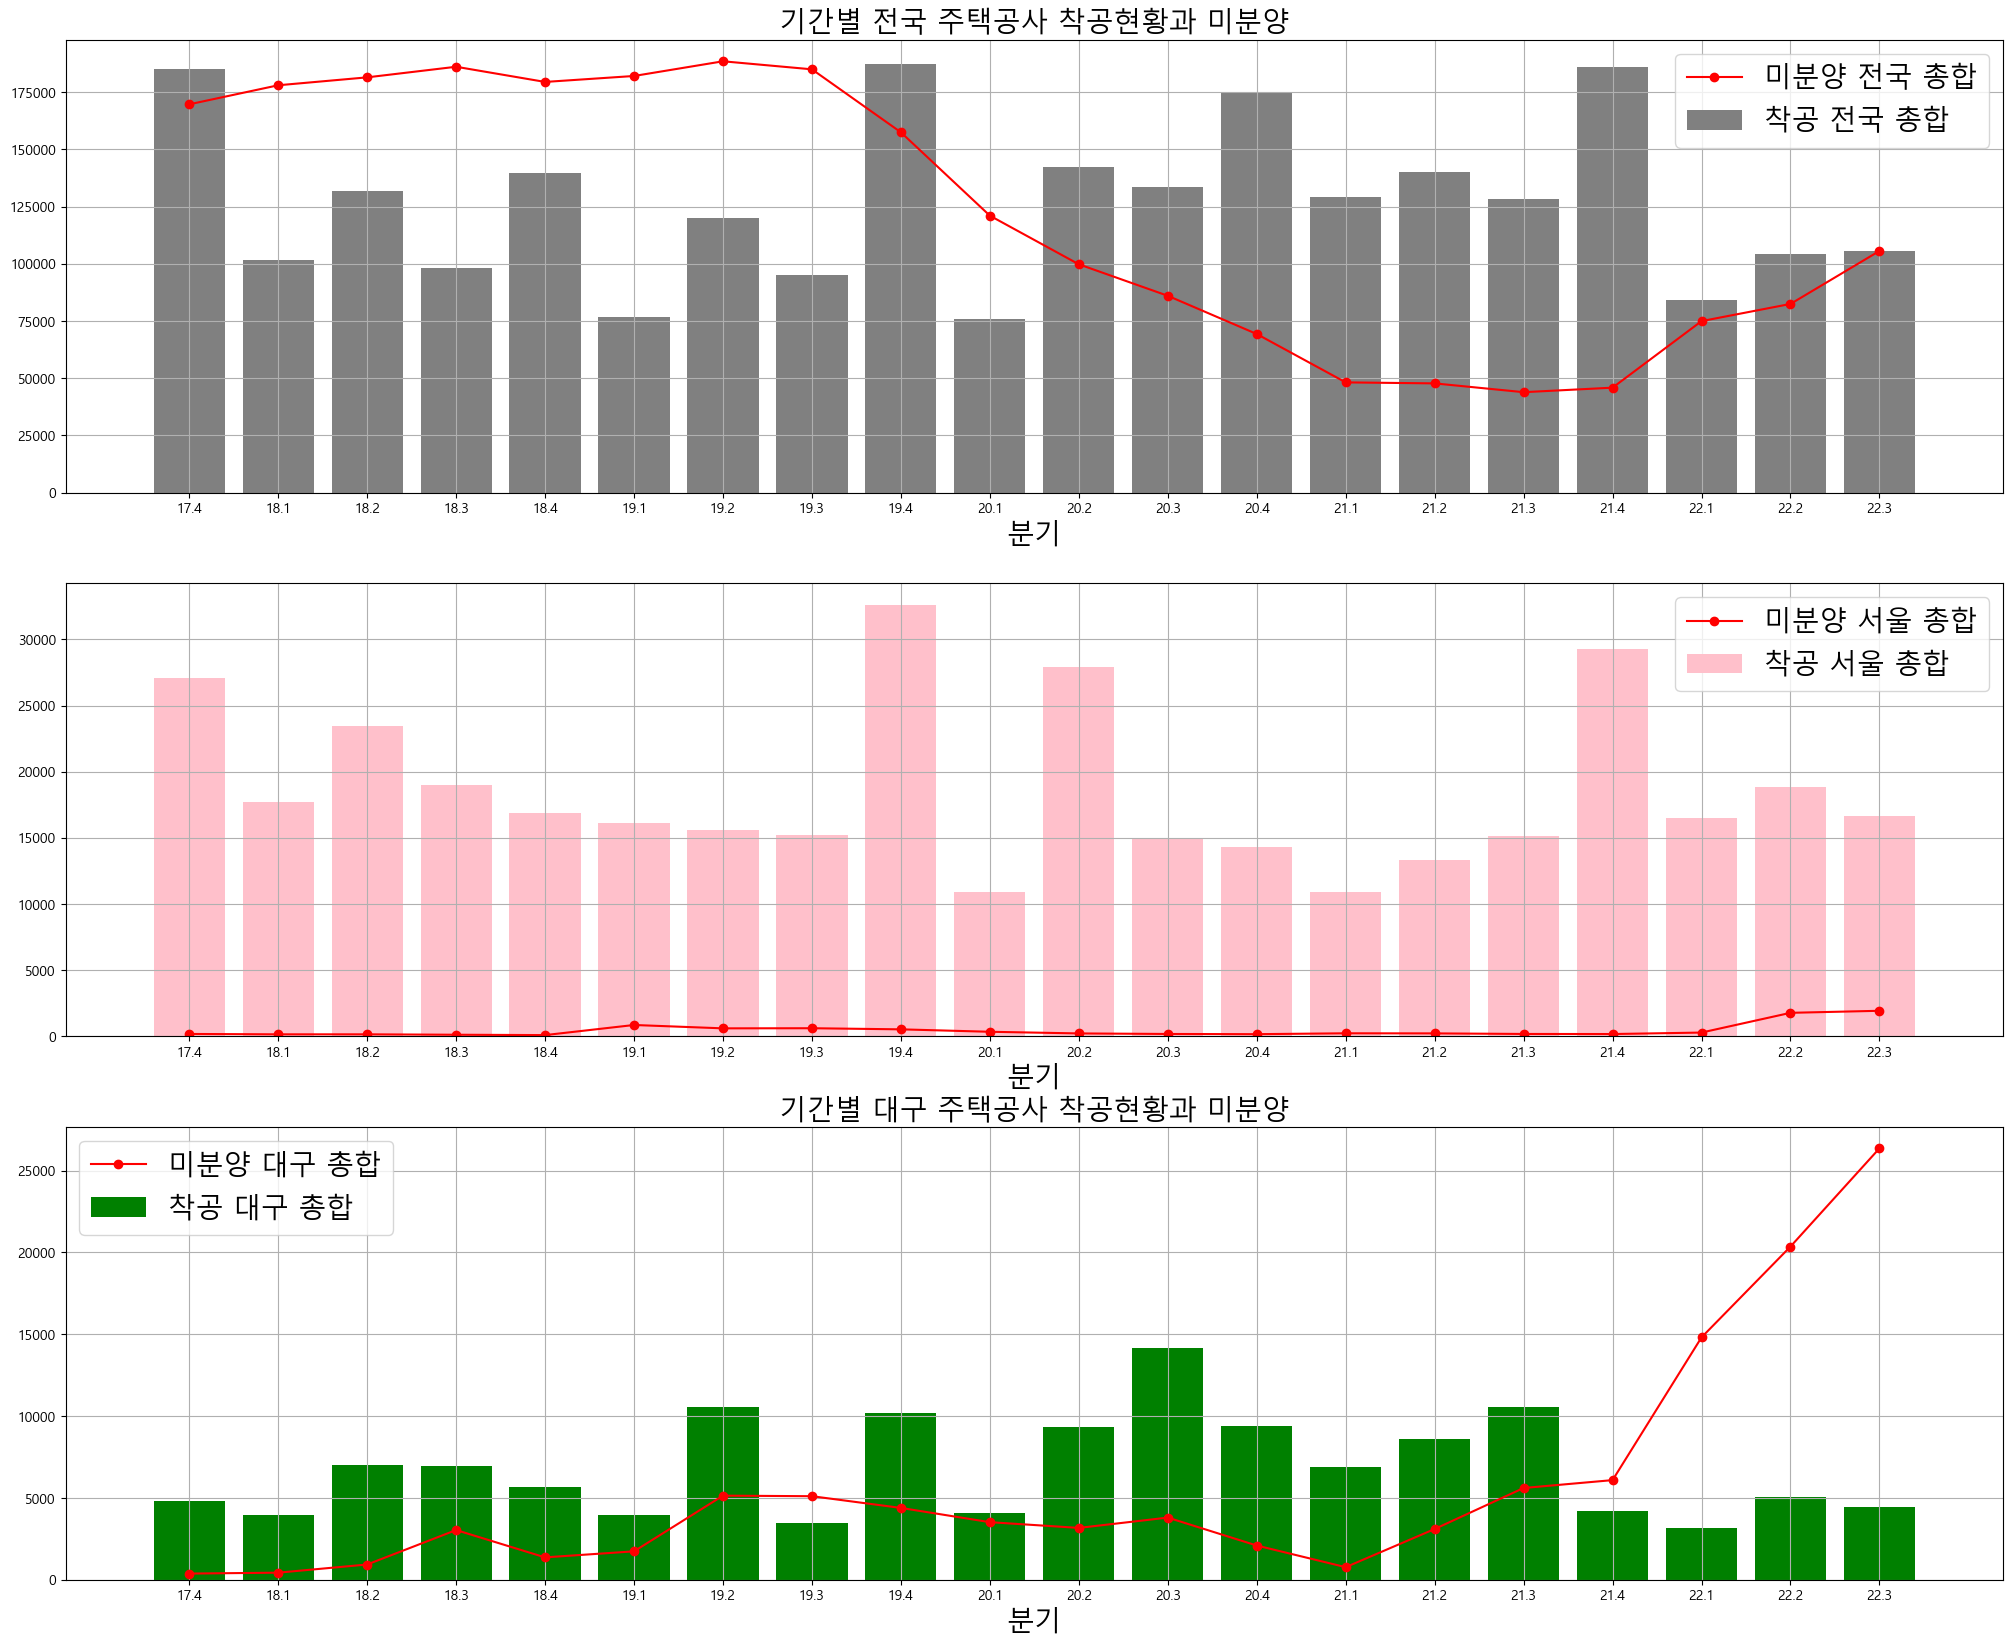

In [103]:
plt.figure(figsize=(25,20))

ax1 = plt.subplot(3,1,1)
plt.bar(x_1,start_ne_df['전국 총합'], color='gray',label='착공 전국 총합')
plt.plot(x_2,not_sell_ne['전국 총합'], 'ro-', label='미분양 전국 총합')
plt.xlabel('분기', fontsize=20)
plt.title('기간별 전국 주택공사 착공현황과 미분양', fontsize=20)
plt.grid()
plt.legend(fontsize=20)

ax2 = plt.subplot(3,1,2)
plt.bar(x_1,start_ne_df['서울특별시'], color='pink',label='착공 서울 총합')
plt.plot(x_2,not_sell_ne['서울특별시'], 'ro-', label='미분양 서울 총합')
plt.xlabel('분기', fontsize=20)
plt.grid()
plt.legend(fontsize=20)


ax3 = plt.subplot(3,1,3)
plt.bar(x_1,start_ne_df['대구광역시'], color='green',label='착공 대구 총합')
plt.plot(x_2,not_sell_ne['대구광역시'], 'ro-', label='미분양 대구 총합')
plt.xlabel('분기', fontsize=20)
plt.title('기간별 대구 주택공사 착공현황과 미분양', fontsize=20)
plt.grid()
plt.legend(fontsize=20)

plt.show()